<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

In [11]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [49]:
# текст запроса
query_3_1 = f'''select count(id) cnt_vacancies
           from public.vacancies
'''

In [50]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [51]:
# текст запроса
query_3_2 = f'''select count(id) cnt_employers
           from public.employers
'''

In [52]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [53]:
# текст запроса
query_3_3 = f'''select count(id) cnt_areas
           from public.areas
'''

In [54]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [55]:
# текст запроса
query_3_4 = f'''select count(id) cnt_industries
           from public.industries
        '''

In [56]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_industries
0,294


***

### Выводы по предварительному анализу данных
В исследуемой базе данных находится 49149 вакансий на 23501 работодателя, что говорит нам о том, 
что в среднем на одного работодателя приходится примерно по 2 вакансии. При этом на всех работадателей существует всего 294 сферы деятельности в 1362 регионах.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [57]:
# текст запроса
query_4_1 = f'''select 
        a.name area,
        count(v.id) cnt
from public.vacancies v
-- Соединим таблицу вакансий с таблицей регионов по id регионов
join public.areas a on a.id = v.area_id 
group by a.name 
order by cnt desc
limit 15
        '''

In [58]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [59]:
# текст запроса
query_4_2 = f'''select 
        count(id) cnt_vac_with_salary
from public.vacancies 
where (salary_from is not NULL) or (salary_to is not NULL)
        '''

In [60]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_vac_with_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [61]:
# текст запроса
query_4_3 = f'''select 
        ROUND(avg(salary_from),0) avg_salary_from,
        ROUND(avg(salary_to),0) avg_salary_to
from public.vacancies
        '''

In [62]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [63]:
# текст запроса
query_4_4 = f'''select 
        distinct schedule, employment,
        count(id) cnt_vacancies
from public.vacancies
group by schedule, employment
order by cnt_vacancies desc
        '''

In [64]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,employment,cnt_vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [32]:
# текст запроса
query_4_5 = f'''select 
        experience,
        count(id) cnt_vacancies
from public.vacancies
group by experience
order by count(id) 
        '''

In [33]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

,experience,cnt_vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### Выводы по детальному анализу вакансий

**4.1** Ожидаемо видим наибольшее количество вакансий в самых крупных городах: Москве и Санкт-Петербурге.

Из данного запроса мы также видим, что в исследуемой базе данных представлены вакансии не только в Российских регионах, 
но и в регионах некоторых других стран, например Белорусии и Казахстана.
Интересно, что обычно наибольшее количество вакансий представлено в столицах государств, т.к. именно эти города являются крупнейшими в стране. Однако для Казахстана такое утверждение неверно, здесь вакансий больше в более крупной Алмате (1892 вакансии), чем в столице страны Астане (840 вакансии). 

**4.2** Здесь мы видим, что количество вакансий, у которых заполнено хотя бы одно поле с зарплатой составляет 24073, это всего лишь половина от всего количества имеющихся в базе вакансий (49197), такой низкий процент заполнения данных может усложнить нам дальнейшие исследования.

**4.3** Средние значения для нижней и верхней границы зарплатной вилки составляют соответственно 71065 р. и	110537 р.

**4.4** По результатам запроса видно, что соискателям будет проще всего найти вакансию на полную занятость, т.к. таких большинство. А вот вакансий с проектной работой существует не так много, особенно в сочетании с вахтовым методтм работы или сменным графиком. Всё-таки работодатели заинтересованы найти себе работника на длительный срок для постоянной работы. Плюс всякие проектные работы с необычными графиками, видимо весьма специфичны и требуют высококлассных или узконаправленных специалистов.

**4.5** Результаты данного запроса говорят нам о том, что больше половины всех вакансий (26152) составляют специальности, которыми не очень сложно овладеть, и для которых не требуется большого опыта. Вторыми в списке по количеству вакансий, очевидно являются более сложные профессии, требующие больших знаний, для таких профессий должно быть важно образование и\или достаточно большой опыт работы, например инженерные специальности. Инженерных специальностей однозначно не может быть больше, чем рабочих. На последнем по количеству вакансий месте, видимо стоят совсем специфические вакансии, требующие от соискателей углублённых познаний в какой-то области. 

Интересно, что неквалифицированный труд стоит на третьем месте по численности вакансий и составляет примерно 1/7 от их общего количества. В исследуемой базе данных не указано, за какой перод взяты вакакнсии и в какие месяцы они публиковались. Было бы интересно посмотреть, как зависит количество предложений от времени. 

В задании 4.1 мы видим зависимость количества вакансий от региона в порядке убывания. Из задания 4.3 знаем среднюю зарплатную вилку по всем регионам. Интересно также узнать, как зарплата зависит от региона. Напишем соответствующий запрос, при этом отсортируем регионы по количеству вакансий в них, как это сделано в пункте 4.1

In [38]:
# 4.x Зарплата по регионам.
query_4_x = f'''select 
        a.name,
        count(v.id) cnt,
        ROUND(avg(v.salary_from),0) avg_salary_from,
        ROUND(avg(v.salary_to),0) avg_salary_to
from public.vacancies v
left join public.areas a on v.area_id = a.id
group by a.name
order by cnt desc-- avg_salary_to desc NULLS LAST, avg_salary_from desc NULLS LAST
limit 15
        '''
# результат запроса
df_4_x = pd.read_sql_query(query_4_x, connection)
df_4_x

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,cnt,avg_salary_from,avg_salary_to
0,Москва,5333,113409.0,160594.0
1,Санкт-Петербург,2851,89892.0,127249.0
2,Минск,2112,68040.0,133797.0
3,Новосибирск,2006,91272.0,137573.0
4,Алматы,1892,53498.0,96238.0
5,Екатеринбург,1698,77489.0,120404.0
6,Нижний Новгород,1670,83734.0,126921.0
7,Казань,1415,76117.0,119942.0
8,Краснодар,1301,78483.0,117144.0
9,Самара,1144,67885.0,101157.0


Из результатов данного запроса видим, что чаще всего, чем больше вакансий в регионе, тем больше и зарплаты. Хотя могут быть и исключения, например, в Казахтане в более крупной Алмате больше вакансий, но зарплаты меньше, чем в меньшей по населению сталице страны Астане (Нур-Султан). 

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [68]:
# текст запроса
query_5_1 = f'''select 
        emp.name employer,
        count(vac.id) cnt_vacacies
from public.vacancies vac
-- Соединим таблицу вакансий и таблицу работодателей по id работодателя
join public.employers emp on vac.employer_id = emp.id
group by employer
order by cnt_vacacies desc
limit 5 
        '''

In [69]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employer,cnt_vacacies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
# текст запроса
query_5_2= f'''select
        a.name area, 
        count(emp.id) cnt_employers,
        count(vac.id) cnt_vacancies
from public.areas a
-- Присоединим к таблице areas таблицу вакансий и таблицу работодателей по id региона,
-- оставив только те записи, где указан регион.
left join public.vacancies vac on a.id = vac.area_id
left join public.employers emp on a.id = emp.area
group by a.name
-- Выберем только те записи, где количество вакансий = 0
having count(vac.id) = 0
order by cnt_employers desc
limit 15
        '''

In [26]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,cnt_employers,cnt_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
5,Беларусь,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# текст запроса
query_5_3 = f'''select
        emp.name employer_name, 
        count(distinct vac.area_id) cnt
from public.employers emp
-- Соединим таблицу работодателей с таблицей вакансий по id работодателя,
-- чтобы увидеть только тех, кто опубликовал вакансии. 
left join public.vacancies vac on emp.id = vac.employer_id
group by emp.name
order by cnt desc
limit 15
        '''

In [28]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employer_name,cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,КРОН,48
9,Почта России,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [78]:
# текст запроса
query_5_4 = f'''select
        count(distinct emp.id) cnt_employers
from public.employers emp
left join public.employers_industries ei on emp.id = ei.employer_id
where ei.industry_id is NULL
        '''

In [79]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_employers
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [82]:
# текст запроса
query_5_5 = f'''select
        emp.name company,
        count(distinct ei.industry_id) cnt_industries
from public.employers emp
left join public.employers_industries ei on emp.id = ei.employer_id
group by emp.name
having count(distinct ei.industry_id) = 4
order by company
limit 3
        '''

In [83]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

,company,cnt_industries
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [86]:
# текст запроса
query_5_6 = f'''select 
      ind.name indusry,
      count(distinct emp.id) cnt_employers
from public.employers emp
-- свяжем таблицу работодателей с таблицей их сфер деятельности
-- при помощи вспомогательной таблицы. 
left join public.employers_industries ei on emp.id = ei.employer_id
left join public.industries ind on ei.industry_id = ind.id
group by ind.name
having ind.name =  'Разработка программного обеспечения'
        '''

In [87]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

,indusry,cnt_employers
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [88]:
# код для получения списка городов-милионников

# получаем таблицу с сайта
tab = pd.read_html(
    'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
    )
df_tab = tab[1]
# превращаем столбец "Город" из полученной таблицы в список
cities_list = df_tab['Город'].to_list()
# корректируем названия городов-милионников
# можно было исправить только название Воронежа
for num in range(len(cities_list)):
    if '[a]' in cities_list[num]:
        cities_list[num] = cities_list[num][:-3]
# преобразуем полученный список в кортеж
cities = tuple(cities_list)
print(cities)

('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [91]:
# текст запроса
query_5_7 = f'''select 
      a.name area,
      count(v.id) cnt
from public.vacancies v 
-- Соединяем таблицу вакансий с таблицами работодателей и регионов
left join public.employers emp on emp.id = v.employer_id
left join public.areas a on a.id = v.area_id
where emp.name = 'Яндекс' 
     and  a.name in {cities}
group by a.name

-- Добавим строку Total с общим количеством вакансий компании.
union 

select 
     'total',
     count(v.id)
from public.vacancies v 
left join public.employers emp on emp.id = v.employer_id
left join public.areas a on a.id = v.area_id
where emp.name = 'Яндекс' and
      a.name in {cities}

order by cnt
        '''

In [92]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7

,area,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

### Выводы по анализу работодателей

**5.1** На первом месте по количеству вакансий стоит компания Яндекс с 1933 заявками, что почти в 4 раза больше, чем количество вакансий у Ростелекома, стоящего на втором месте. Далее идут такие крупные компании как Тинькофф, СБЕР, Газпромнефть. Интересно, что разница в количестве вакансий между первым и вторым местом в разы больше, чем между остальными компаниями из пятёрки лидеров. Могу предположить, что такой разрыв связан с размерами компании Яндекс, а может ещё и с тем, что у Яндекса множество сфер деятельности (тут должны быть и Яндекс-лавка, и Яндекс-карты, и Яндекс-Практикум и др.), тогда как остальные компании имеют более-менее одну направленность. Ниже проверю своё предположение с помощью отдельного запроса (пункт 5.x).

**5.2** Наибольшее количество работодателей среди регионов, где нет вакансий находится в России.

**5.3** Яндекс является компанией, которая публикует вакансии в наибольшем количестве регионов. На втором месте находится Ростелеком. Т.е. эти две компании лидируют как по количеству вакансий на рынке труда, так и по количеству регионов деятельности. На 4 месте стоит компания с ничего не говорящим названием "Поляков Денис Иванович", при проверке оказалось, что это компания по ремонту компьютеров (текст запроса не привожу, чтобы не загромождать проект лишним). 

**5.4** 8419 компаний не указали сферу деятельности, это примерно 36% от общего числа работодателей (23501), что довольно много. И если в дальнейшем нам понадобится данный столбец, то нужно понять, как заполнить пропуски.

**5.5** На третьем месте в списке (по названию) компаний, у которых указано четыре сферы деятельности стоит 2ГИС (сферы деятельности: Производство мультимедиа, контента, редакторская деятельность; Консалтинговые услуги; Колл-центры, диспетчерские службы; Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)).

**5.6** Разработка программного обеспечения	указана у 3553 компаний, т.е. примерно у 15% всех работодателей.

**5.7** Вернувшись к крупнейшей компании по количеству вакансий и регионв Яндексу, обнаружим, что примерно 1\4 из всех их вакансий (485 из 1933) публикуется в городах милионниках России. 

In [44]:
# 5.x Проверка предположения, что у Яндекса больше сфер деятельности,
# чем у остальных компаний из пятёрки лидеров.
query_5_x = f'''select
        emp.name company,
        count(distinct ei.industry_id) cnt_industries
from public.employers emp
left join public.employers_industries ei on emp.id = ei.employer_id
where emp.name in ('Яндекс', 'Ростелеком', 'Тинькофф', 'СБЕР', 'Газпром нефть')
group by emp.name
order by cnt_industries desc
        '''
# результат запроса
df_5_x = pd.read_sql_query(query_5_x, connection)
df_5_x

,company,cnt_industries
0,Тинькофф,5
1,Ростелеком,4
2,Газпром нефть,3
3,СБЕР,1
4,Яндекс,1


In [4]:
# 5.y Посмотрим название сферы деятельности Яндекса
query_5_y = f'''select 
      emp.name,
      ind.name
    
from public.employers emp
-- свяжем таблицу работодателей с таблицей их сфер деятельности
-- при помощи вспомогательной таблицы. 
left join public.employers_industries ei on emp.id = ei.employer_id
left join public.industries ind on ei.industry_id = ind.id
where emp.name = 'Яндекс'
        '''
# результат запроса
df_5_y = pd.read_sql_query(query_5_y, connection)
df_5_y

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,name
0,Яндекс,"Интернет-компания (поисковики, платежные систе..."


Отмечу, что при проверке оказалось, что формально моё предположение неверно, т.к. в БД у данной компании прописан только один вид деятельности. Но по факту предположение кажется мне верным, просто компания не расписывала всё подробно, указав сферу деятельности с расплывчатыми параметрами (Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)).
Учитывая это и то, что сферу деятельности указывают далеко не все (36% работодателей не заполнили эту таблицу), предположу, что, возможно, в зависимости от направления дальнейшего исследования, данная информация может не пригодиться и её можно опустить.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [12]:
# текст запроса
query_6_1 = f'''select count(id)
from public.vacancies
where LOWER(name) like '%данн%'
or LOWER(name) like'%data%'
        '''

In [13]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [14]:
# текст запроса
query_6_2 = f'''select count(id) cnt_vacancies
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%') 
      )
and   (
      LOWER(name) like '%junior%' 
      or LOWER(experience) like '%нет опыта%'
      or LOWER(employment) like '%стажировка%'
      )
        '''

In [15]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [16]:
# текст запроса
query_6_3 = f'''select count(id) cnt_vacancies
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%') 
      )
and   (
      LOWER(key_skills) like '%sql%'
      or LOWER(key_skills) like '%postgres%'
      )
        '''

In [17]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3
# ответ будет на 1 отличаться от того, который нужно было вводить на сайте Skill Factory,
# т.к. там предполагался поиск, не учитывающий условие "name NOT LIKE '%QML%'",
# и в ответ попадала лишняя вакансия

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_vacancies
0,200


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [18]:
# текст запроса
query_6_4 = f'''select count(id) cnt_vacancies
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%') 
      )
and   (
      LOWER(key_skills) like '%python%'
      )
        '''

In [19]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,cnt_vacancies
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [20]:
# текст запроса
query_6_5 = f'''select ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9) , '')) + 1), 2) avg_skills_DS
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%') 
      )
and 
      key_skills is not NULL
        '''

In [21]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5
# ответ будет немного отличаться от того, который нужно было вводить на сайте Skill Factory,
# т.к. там предполагался поиск, не учитывающий условие "name NOT LIKE '%QML%'"

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_skills_ds
0,6.43


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [22]:
# текст запроса
query_6_6 = f'''select experience,
       ROUND(AVG((coalesce(salary_from, salary_to) + coalesce(salary_to, salary_from))/2), 0) avg_salary
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%') 
      )
and   (
      salary_from is not NULL 
      or salary_to is not NULL
      )
group by experience
        '''

In [23]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,142626.0
2,От 3 до 6 лет,243115.0


***

### Выводы по предметному анализу

**6.1** К данным имеет отношение малая часть вакансий, а именно 1771 из 49197, что составляет 3,6% всех вакансий.

**6.2** Всего 51 вакансия подходит для начинающего дата-сайентиста, что говорит о том, что нам (учащимся на курсах) будет не так-то просто найти работу и потребуется приложить достаточно много усилий.

Рассмотрим, вакансий с каким опытом DS больше всего на рынке труда (см. пункт 6.x, представленный ниже). Здесь мы видим, что всего вакансий DS насчитывается 467, из них примерно в половине случаев требуется опыт от 1 до 3 лет (219 шт.), а меньше всего вакансий, где готовы принять человека без опыта работы (всего 28). Интересно было бы узнать, за какой период собраны даные в исследуемой базе, и как меняется рынок труда в данной сфере с течением времени.

**6.3** В 200 вакансиях в качестве ключевого навыка указаны SQL или postgres, что составляет почти половину вакансий для дата-сайентистов, что свидетельствует о важности знания SQL в этой области.


**6.4** Python является ещё более важным навыком для дата-сайентистов, он требуется в 351 вакансии из 467, т.е в 75% случаев.

**6.5** Для вакансии DS в среднем указывается 6,43 ключивых навыков.

**6.6** Написав запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта, можно проследить чёткую зависимость: чем больше опыт, тем больше зарплата. Заметим, что в получившемся датафрейме отсутствует графа с опытом более 6 лет, хотя у нас точно есть 34 вакансии для дата-сайентистов с опытом более 6 лет. Не совсем понятно, почему компании не указывают уровень ЗП для таких вакансий, вероятно это связано с тем, что такие опытные специалисты сами называют стоимость своих услуг, поэтому размер ЗП решается на собеседовании.  

In [6]:
# 6.x Отсортируем вакансии дата-сайентистов по требуемуему опыту работы
query_6_x = f'''select 
        experience,
        count(id) cnt_vacancies
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%')
      )
group by experience

-- Добавим общее число вакансий дата-сайентистов
union

select 'total',
        count(id)
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%')
      )       
order by cnt_vacancies      
        '''
# результат запроса
df_6_x = pd.read_sql_query(query_6_x, connection)
df_6_x

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,cnt_vacancies
0,Нет опыта,28
1,Более 6 лет,34
2,От 3 до 6 лет,186
3,От 1 года до 3 лет,219
4,total,467


# Общий вывод по проекту

### Подведем итог исследования, обобщите выводы

В пункте 7.1 (см. ниже) можно увидеть, какие специальности наиболее восстребованы на рынке труда. В первую десятку попадают: Системный администратор; Программист 1С; Бизнес-аналитик; Специалист технической поддержки; Системный аналитик; Аналитик; Инженер-программист; Программист 1C (попал в список дважды, видимо из-за особенностей написания 1С); Frontend-разработчик; Инженер технической поддержки. В исследуемой БД находятся по большей части вакансии из сферы IT.

Компании скорее заинтересованы взять на работу сотрудников на полную занятость, нежели на стажировку или проектную работу.

Также соискателю желательно иметь опыт работы от 1 года до трёх и больше.

Наибольшее количество вакансий наблюдается в крупных городах. В глобальном смысле здесь наблюдается закономерность: чем больше город, тем больше в нём вакансий. То же самое касается и средней Заработной платы. Однако, если рассматривать города, у которых количество населения отличается друг от друга незначительно, то данное правило может не работать. 

Что каксается профессии дата-сайентиста, то количество подходящих вакансий составляет примерно 1% от всех исследуемых (467 из 49197). При этом доля компаний, готовых принять начинающего специалиста в данной области (без опыта работы) ещё меньше (примерно 0.06% от всех вакансий). Это говорит о том, что не так-то просто начинающему исследователю данных найти себе работу.

Хотелось бы еще поисследовать динамику появления вакансий в зависимости от времени, чтобы лучше понимать тенденции, но, к сожалению, подходящими данными для исследовани мы не обладаем.

В заключение для большей наглядности хочу проиллюстрировать соотношение количества DS вакансий и всех остальных специальностей, а также соотношение вакансий DS в зависимости от опыта работы (см. пункты 7.2 и 7.3 ниже).

In [8]:
# 7.1 Выведем 10 самых востребованных профессий, содержащихся в БД
query_7_1 = f'''select 
        name,
        count (id)
from public.vacancies
group by name
order by count(id) desc 
Limit 10     
        '''
# результат запроса
df_7_1 = pd.read_sql_query(query_7_1, connection)
df_7_1

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,name,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.style.use('default')

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


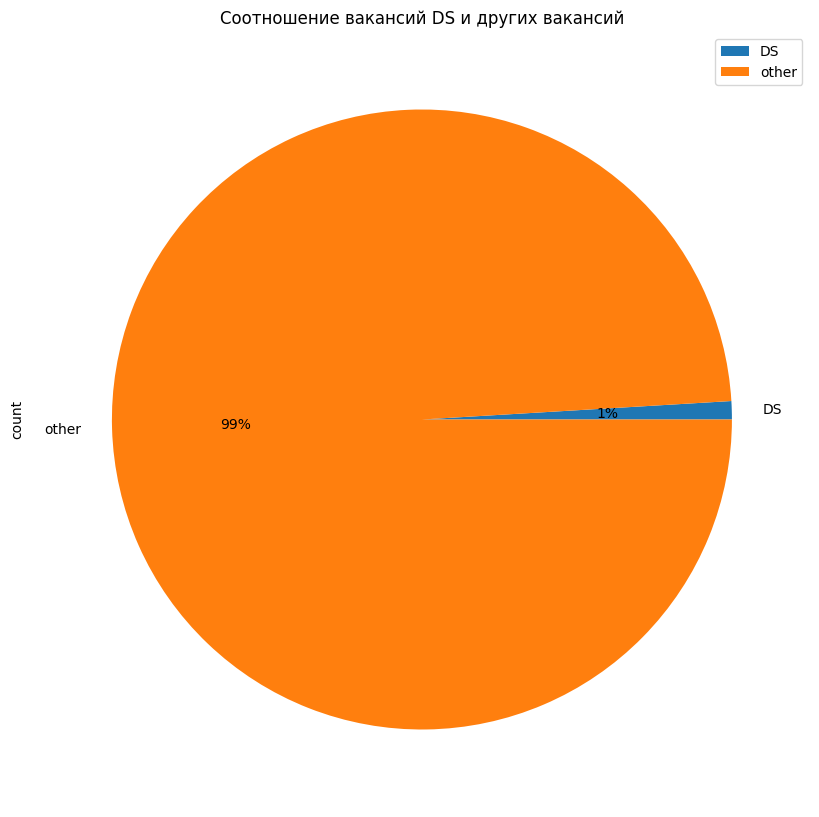

In [12]:
# 7.2 Напишем запрос, выводящий количество вакансий для датасайентистов
# и колчество всех остальных вакансий.
query_7_2 = f'''select 'DS' title,
       count(id)
from public.vacancies
-- Параметры для DS вакансий 
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%')
     )  
union

select 'other',
       count(id)
from public.vacancies
-- Параметры для всех остальных вакансий
where not (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%')
     )  
        '''
# результат запроса
df_7_2 = pd.read_sql_query(query_7_2, connection)

#Построим круговую диаграмму
df_7_2.groupby(['title']).sum().plot(
    kind='pie',
    y = 'count',
    autopct='%1.0f%%',
    title='Соотношение вакансий DS и других вакансий',
    figsize=(10, 12),
);

/home/masha/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


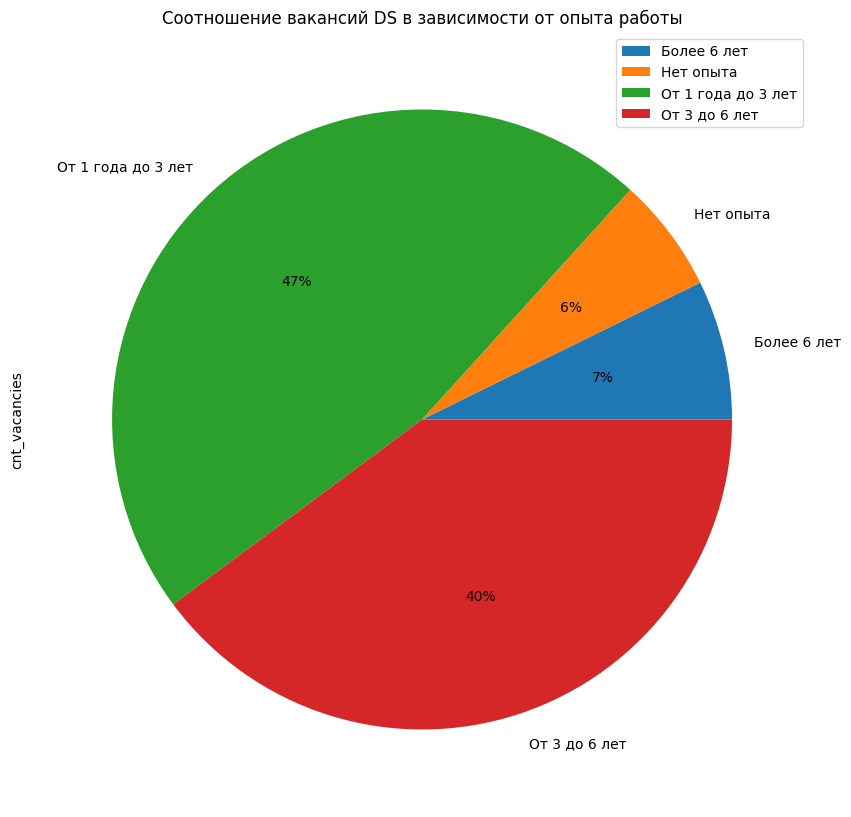

In [13]:
# 7.3 Создадим запрос с количеством DS вакансий 
# в зависимости от опыта работы.  
query_7_3 = f'''select 
        experience,
        count(id) cnt_vacancies
from public.vacancies
where (
      LOWER(name) like '%data scientist%' 
      or LOWER(name) like '%data science%'
      or LOWER(name) like '%исследователь данных%' 
      or LOWER(name) like '%машинн%обучен%'
      or LOWER(name) like '%machine learning%'
      or (name LIKE '%ML%' AND name NOT LIKE '%HTML%' AND name NOT LIKE '%QML%')
      )
group by experience
'''
# результат запроса запишем в датафрейм
df_7_3 = pd.read_sql_query(query_7_3, connection)

# Построим круговую диаграмму DS вакансий 
# в зависимости от опыта работы
df_7_3.groupby(['experience']).sum().plot(
    kind='pie',
    y = 'cnt_vacancies',
    autopct='%1.0f%%',
    title='Соотношение вакансий DS в зависимости от опыта работы',
    figsize=(10, 12),
);